In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, top_k_accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd

In [2]:
dataset = 'dat\gempundit_2022_cropped_augmented_2000'
run = 'first_run_gempundit_2022_cropped_augmented_2000'


In [4]:
results = {}
top_results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Top-3 Accuracy', 'Top-5 Accuracy'])

for dataset in os.listdir('../mod/'):
    for file in os.listdir(f'../mod/{dataset}/'):
        if file.endswith('.csv'):
            model = os.path.splitext(file)[0]
            print(f'Processing {model}...')
            history = pd.read_csv(f'../mod/{dataset}/{file}')
            results[model + ' ' + dataset] = history
            top_results = pd.concat([top_results, pd.DataFrame({'Model': model,
                                                                'Dataset': dataset,
                                                                'Accuracy': history['val_accuracy'].max(),
                                                                'Top-3 Accuracy': history['val_top_3_accuracy'].max(),
                                                                'Top-5 Accuracy': history['val_top_5_accuracy'].max()}, index=[0])])
top_results[top_results['Dataset'] == run].sort_values(by='Accuracy', ascending=False)


Processing MobileNet...
Processing OwnModel...
Processing OwnModelRegularized...
Processing ResNet50...
Processing VGG16...
Processing MobileNet...
Processing VGG16...
Processing MobileNet...
Processing OwnModel...
Processing ResNet50...
Processing VGG16...
Processing MobileNet...
Processing OwnModel...
Processing ResNet50...
Processing VGG16...
Processing OwnModelRegularized...


C:\Users\david\AppData\Local\Temp\ipykernel_4620\2634785653.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_results = pd.concat([top_results, pd.DataFrame({'Model': model,


,Model,Dataset,Accuracy,Top-3 Accuracy,Top-5 Accuracy
0,ResNet50,first_run_gempundit_2022_cropped_augmented_2000,0.563305,0.877011,0.924228
0,OwnModelRegularized,first_run_gempundit_2022_cropped_augmented_2000,0.538542,0.854727,0.912685
0,VGG16,first_run_gempundit_2022_cropped_augmented_2000,0.516501,0.845589,0.906756
0,OwnModel,first_run_gempundit_2022_cropped_augmented_2000,0.507606,0.828044,0.892461
0,MobileNet,first_run_gempundit_2022_cropped_augmented_2000,0.456476,0.755577,0.833609


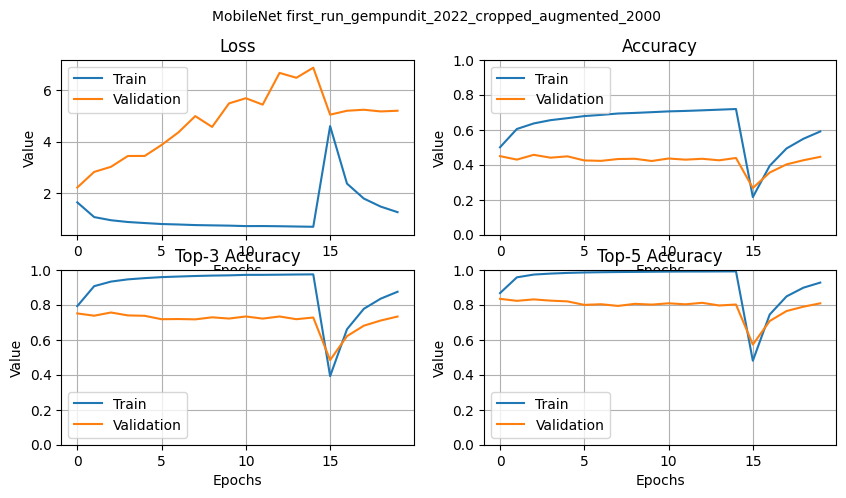

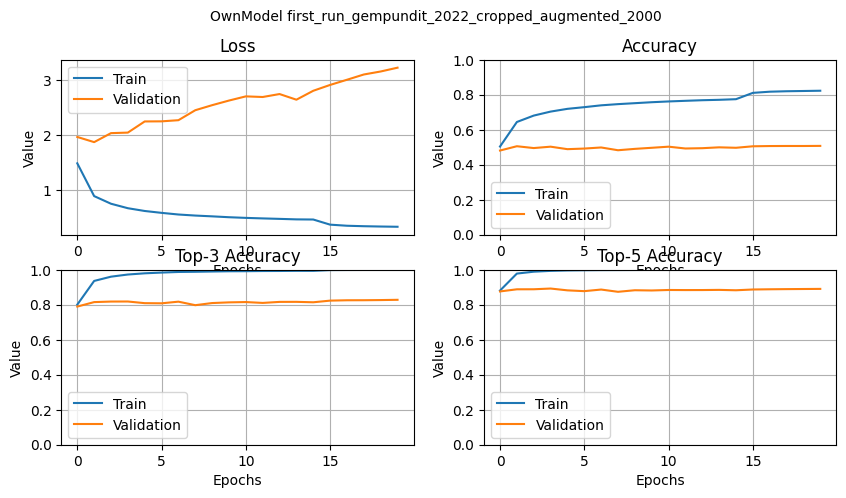

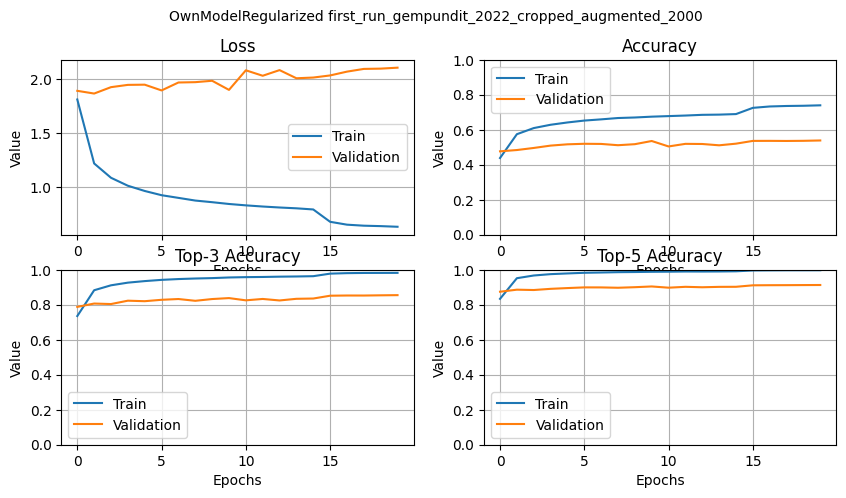

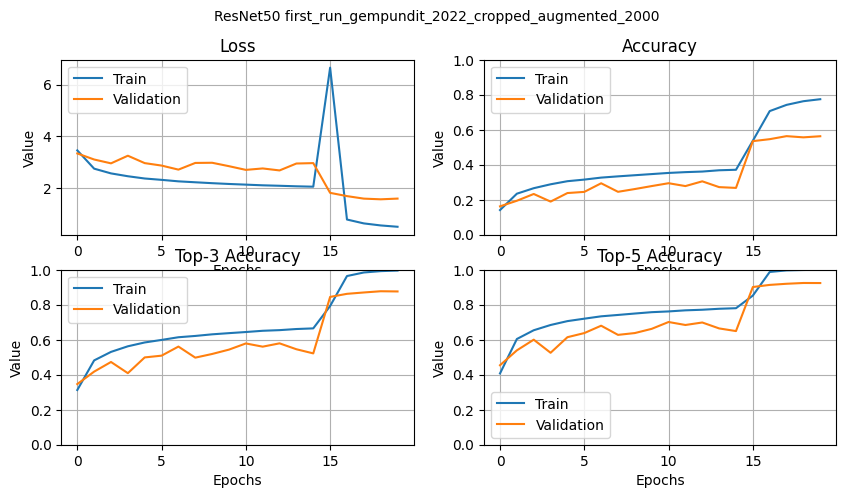

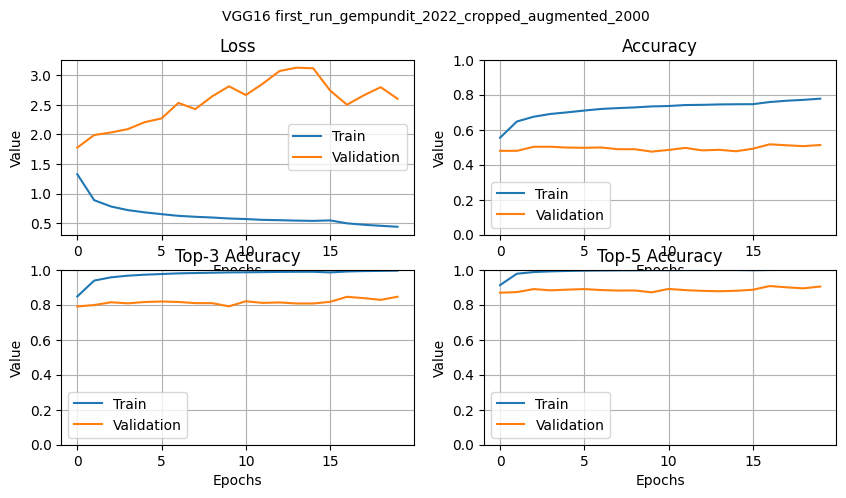

In [6]:
# Define a function to plot the metrics with adjusted y-axis limits for accuracy plots
def plot_metrics_adjusted(history, title):
    fig, axs = plt.subplots(2, 2, figsize=(10, 5))
    fig.suptitle(title, fontsize=10)

    # Loss
    axs[0, 0].plot(history['loss'], label='Train')
    axs[0, 0].plot(history['val_loss'], label='Validation')
    axs[0, 0].set_title('Loss')
    axs[0, 0].legend()

    # Accuracy
    axs[0, 1].plot(history['accuracy'], label='Train')
    axs[0, 1].plot(history['val_accuracy'], label='Validation')
    axs[0, 1].set_title('Accuracy')
    axs[0, 1].set_ylim([0, 1])
    axs[0, 1].legend()

    # Top-3 Accuracy
    axs[1, 0].plot(history['top_3_accuracy'], label='Train')
    axs[1, 0].plot(history['val_top_3_accuracy'], label='Validation')
    axs[1, 0].set_title('Top-3 Accuracy')
    axs[1, 0].set_ylim([0, 1])
    axs[1, 0].legend()

    # Top-5 Accuracy
    axs[1, 1].plot(history['top_5_accuracy'], label='Train')
    axs[1, 1].plot(history['val_top_5_accuracy'], label='Validation')
    axs[1, 1].set_title('Top-5 Accuracy')
    axs[1, 1].set_ylim([0, 1])
    axs[1, 1].legend()

    for ax in axs.flat:
        ax.set(xlabel='Epochs', ylabel='Value')
        ax.grid()

for model, history in results.items():
    if run in model:
        plot_metrics_adjusted(history, model)


In [8]:
top_results

,Model,Dataset,Accuracy,Top-3 Accuracy,Top-5 Accuracy
0,MobileNet,first_run_gempundit_2022_cropped_augmented_2000,0.456476,0.755577,0.833609
0,OwnModel,first_run_gempundit_2022_cropped_augmented_2000,0.507606,0.828044,0.892461
0,OwnModelRegularized,first_run_gempundit_2022_cropped_augmented_2000,0.538542,0.854727,0.912685
0,ResNet50,first_run_gempundit_2022_cropped_augmented_2000,0.563305,0.877011,0.924228
0,VGG16,first_run_gempundit_2022_cropped_augmented_2000,0.516501,0.845589,0.906756
0,MobileNet,gempundit_2022_cropped_augmented_2000,0.472880,0.767728,0.842236
0,VGG16,gempundit_2022_cropped_augmented_2000,0.516865,0.834386,0.899125
0,MobileNet,images_cropped_augmented_1000,0.428560,0.670662,0.764791
0,OwnModel,images_cropped_augmented_1000,0.521005,0.800559,0.878336
0,ResNet50,images_cropped_augmented_1000,0.186574,0.363497,0.466856


In [12]:
top_results['Accuracy']

0    0.456476
0    0.507606
0    0.538542
0    0.563305
0    0.516501
0    0.472880
0    0.516865
0    0.428560
0    0.521005
0    0.186574
0    0.504155
0    0.447379
0    0.538392
0    0.212088
0    0.514250
0    0.537730
Name: Accuracy, dtype: float64

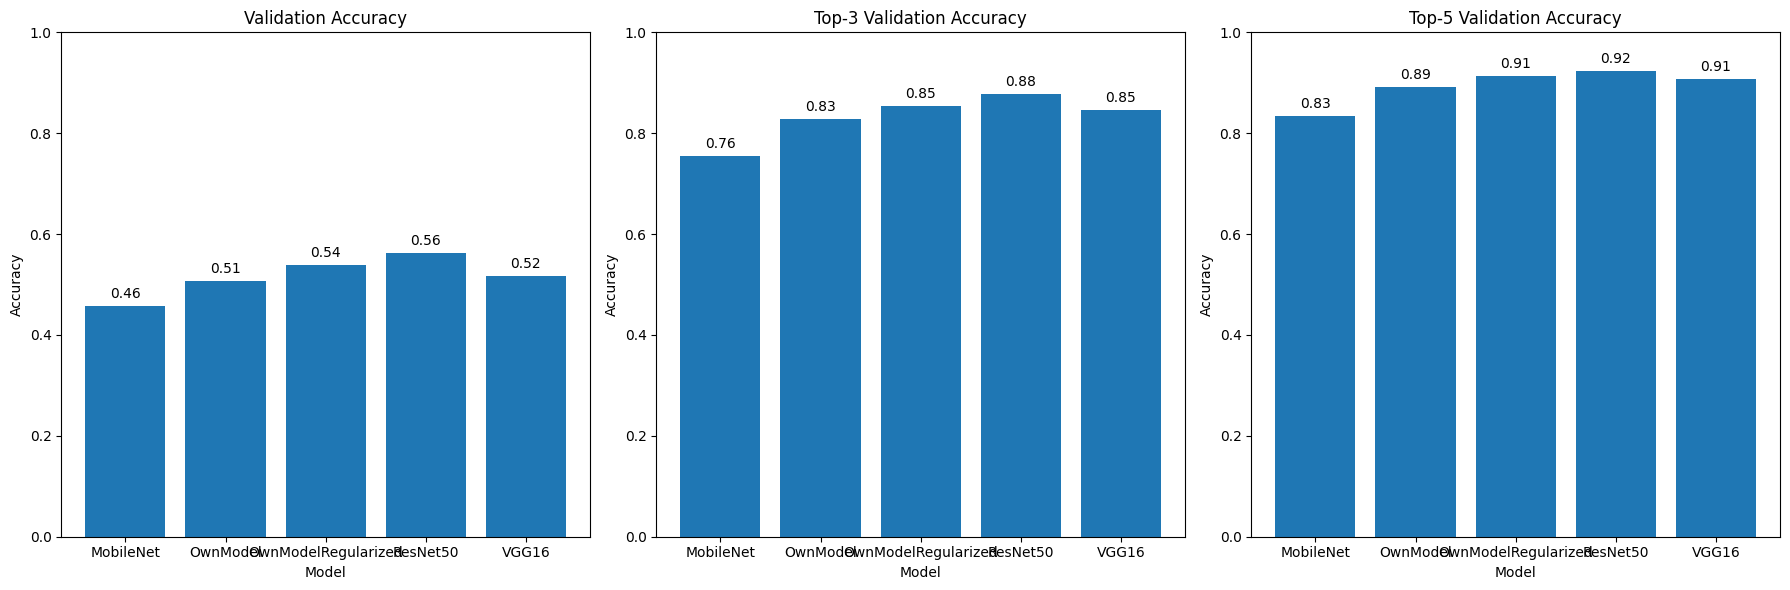

In [17]:
# Function to create bar plots for each Top-k accuracy
def create_bar_plot(y_values, title, y_label, ax):
    ax.bar(top_results[top_results['Dataset'] == run]['Model'], y_values)
    ax.set_title(title)
    ax.set_ylim([0, 1])
    ax.set_xlabel('Model')
    ax.set_ylabel(y_label)
    for i, v in enumerate(y_values):
        ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy plot
create_bar_plot(top_results[top_results['Dataset'] == run]['Accuracy'], 'Validation Accuracy', 'Accuracy', axs[0])

# Top-3 Accuracy plot
create_bar_plot(top_results[top_results['Dataset'] == run]['Top-3 Accuracy'], 'Top-3 Validation Accuracy', 'Accuracy', axs[1])

# Top-5 Accuracy plot
create_bar_plot(top_results[top_results['Dataset'] == run]['Top-5 Accuracy'], 'Top-5 Validation Accuracy', 'Accuracy', axs[2])

plt.tight_layout()
plt.show()

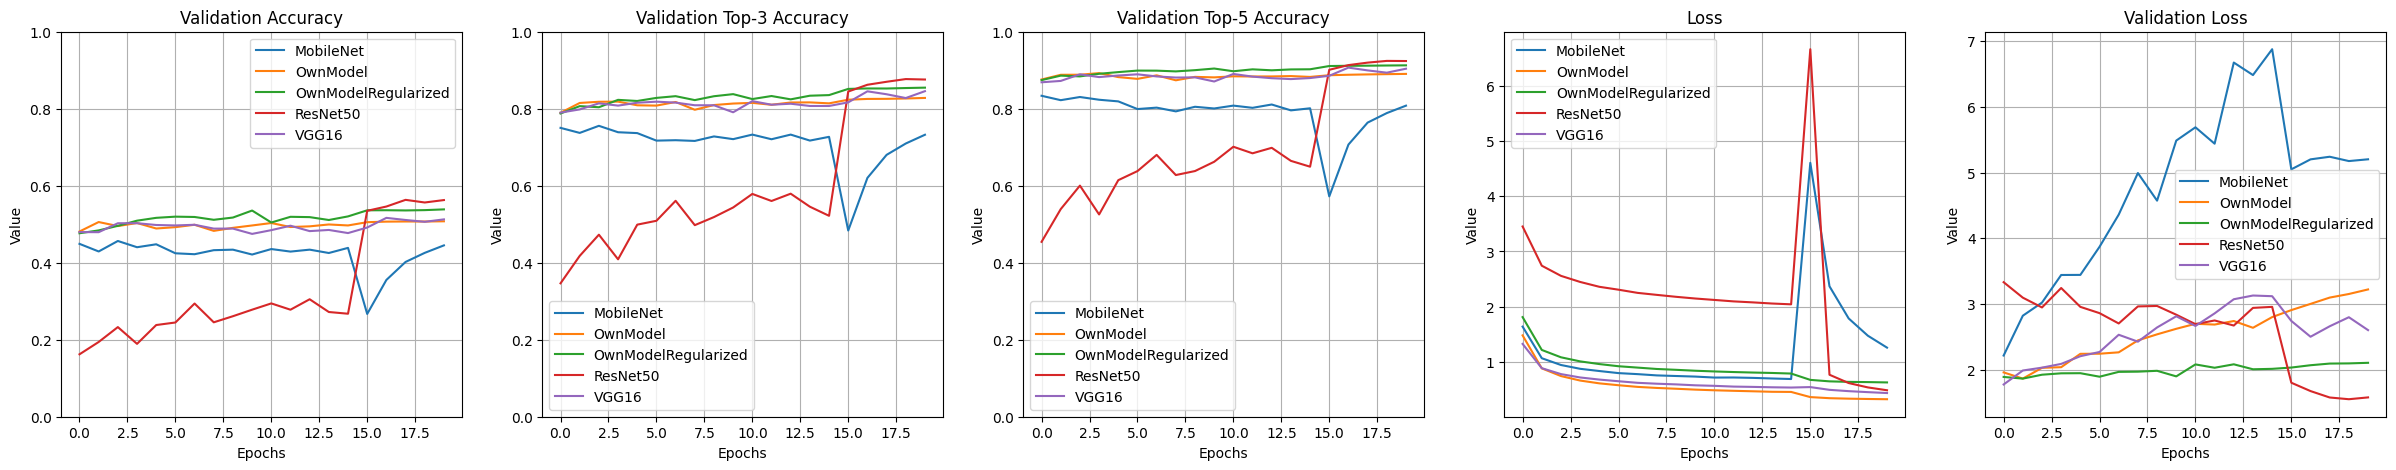

In [21]:
def plot_combined_metrics(histories, titles):
    fig, axs = plt.subplots(1, 5, figsize=(30, 5))
    
    # Iterate over each metric and plot for all models
    for i, metric in enumerate(['val_accuracy', 'val_top_3_accuracy', 'val_top_5_accuracy', 'loss', 'val_loss']):
        for model_name, history in histories.items():
            if run in model_name:
            # For accuracy metrics, plot validation only
                axs[i].plot(history[f'{metric}'], label=f'{model_name.split(" ")[0]}')
        
        axs[i].set_title(f'{titles[i]}')
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel('Value')
        if 'accuracy' in metric:
            axs[i].set_ylim([0, 1])
        axs[i].legend()
        axs[i].grid()

plot_combined_metrics(results, ['Validation Accuracy', 'Validation Top-3 Accuracy', 'Validation Top-5 Accuracy', 'Loss', 'Validation Loss'])

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
models_path = r'C:\Users\david\projects\University\gemstone-classifier\mod\first_run_gempundit_2022_cropped_augmented_2000'
data_dir = r'C:\Users\david\projects\University\gemstone-classifier\dat\gempundit_2022_cropped_augmented_2000'

models = []
for file in os.listdir(os.path.normpath(models_path)):
    if file.endswith('llr.h5'):
        models.append(file)

# Parameters (replace these with your values)
target_size = (224, 224)  # Example target size
batch_size = 32
validation_split = 0.2

# Image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

# Load data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=False  # Important for evaluation
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important for evaluation
)

# Evaluate the model
val_steps = val_data.samples // batch_size

true_classes = val_data.classes
true_classes = true_classes[:val_steps * batch_size]  # Aligning the true labels length with the prediction length

index_to_class = {v: k for k, v in val_data.class_indices.items()}

results = {}
for model_name in models:
    print(f'Processing {model_name}...')
    model = load_model(models_path + '/' + model_name)

    predictions = model.predict(val_data, steps=val_steps)

    predicted_probs = predictions[:len(true_classes)]  # Aligning the prediction length with true labels
    predicted_labels = np.argmax(predicted_probs, axis=1)

    results[model_name] = {
        'predicted_probs': predicted_probs,
        'predicted_labels': predicted_labels
    }


Found 164657 images belonging to 99 classes.
Found 41150 images belonging to 99 classes.
Processing MobileNet_FT_llr.h5...
1285/1285 [==============================] - 66s 49ms/step
Processing OwnModelRegularized_FT_llr.h5...
1285/1285 [==============================] - 54s 42ms/step
Processing OwnModel_FT_llr.h5...
1285/1285 [==============================] - 54s 42ms/step
Processing ResNet50_FT_llr.h5...
1285/1285 [==============================] - 100s 77ms/step
Processing VGG16_FT_llr.h5...
1285/1285 [==============================] - 98s 74ms/step


In [23]:
import pickle
pickle.dump(results, open('results.pkl', 'wb'))

### Top-K Accuracy

In [25]:
# Custom function to calculate top-k accuracy
def top_k_accuracy(true_labels, pred_labels, k):
    top_k_preds = np.argsort(pred_labels, axis=1)[:, -k:]
    match_array = np.any(top_k_preds == np.array(true_labels)[:, None], axis=1)
    top_k_accuracy = np.mean(match_array)
    return top_k_accuracy


top_k_acc = {}
for model, result in results.items():
    predicted_probs = result['predicted_probs']
    predicted_labels = result['predicted_labels']
    top_k_acc[model] = {}
    for k in [1, 3, 5]:
        ac = top_k_accuracy(true_classes, predicted_probs, k)
        top_k_acc[model][f'top_{k}_accuracy'] = ac
top_k_acc

{'MobileNet_FT_llr.h5': {'top_1_accuracy': 0.4453550583657588,
  'top_3_accuracy': 0.7321741245136186,
  'top_5_accuracy': 0.8077821011673152},
 'OwnModelRegularized_FT_llr.h5': {'top_1_accuracy': 0.5389348249027237,
  'top_3_accuracy': 0.8546206225680933,
  'top_5_accuracy': 0.9126215953307393},
 'OwnModel_FT_llr.h5': {'top_1_accuracy': 0.5079523346303502,
  'top_3_accuracy': 0.8279182879377431,
  'top_5_accuracy': 0.8903696498054474},
 'ResNet50_FT_llr.h5': {'top_1_accuracy': 0.5631566147859922,
  'top_3_accuracy': 0.8757538910505837,
  'top_5_accuracy': 0.9238083657587549},
 'VGG16_FT_llr.h5': {'top_1_accuracy': 0.5129377431906614,
  'top_3_accuracy': 0.845476653696498,
  'top_5_accuracy': 0.9038667315175097}}

## Per-class evaluation

### Custom Metric

In [26]:
k = 10

num_classes = np.max(true_classes) + 1  # Assuming class labels are 0-indexed
for model, result in results.items():
    ious = []
    predicted_labels = result['predicted_labels']
    for class_id in range(num_classes):
        TP = np.sum((predicted_labels == class_id) & (true_classes == class_id))
        FP = np.sum((predicted_labels == class_id) & (true_classes != class_id))
        FN = np.sum((predicted_labels != class_id) & (true_classes == class_id))
        iou = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
        ious.append(iou)
    # Convert ious to a numpy array if it's not already
    ious_array = np.array(ious)

    results[model]['ious'] = ious_array


#### Top-K Predicted Classes

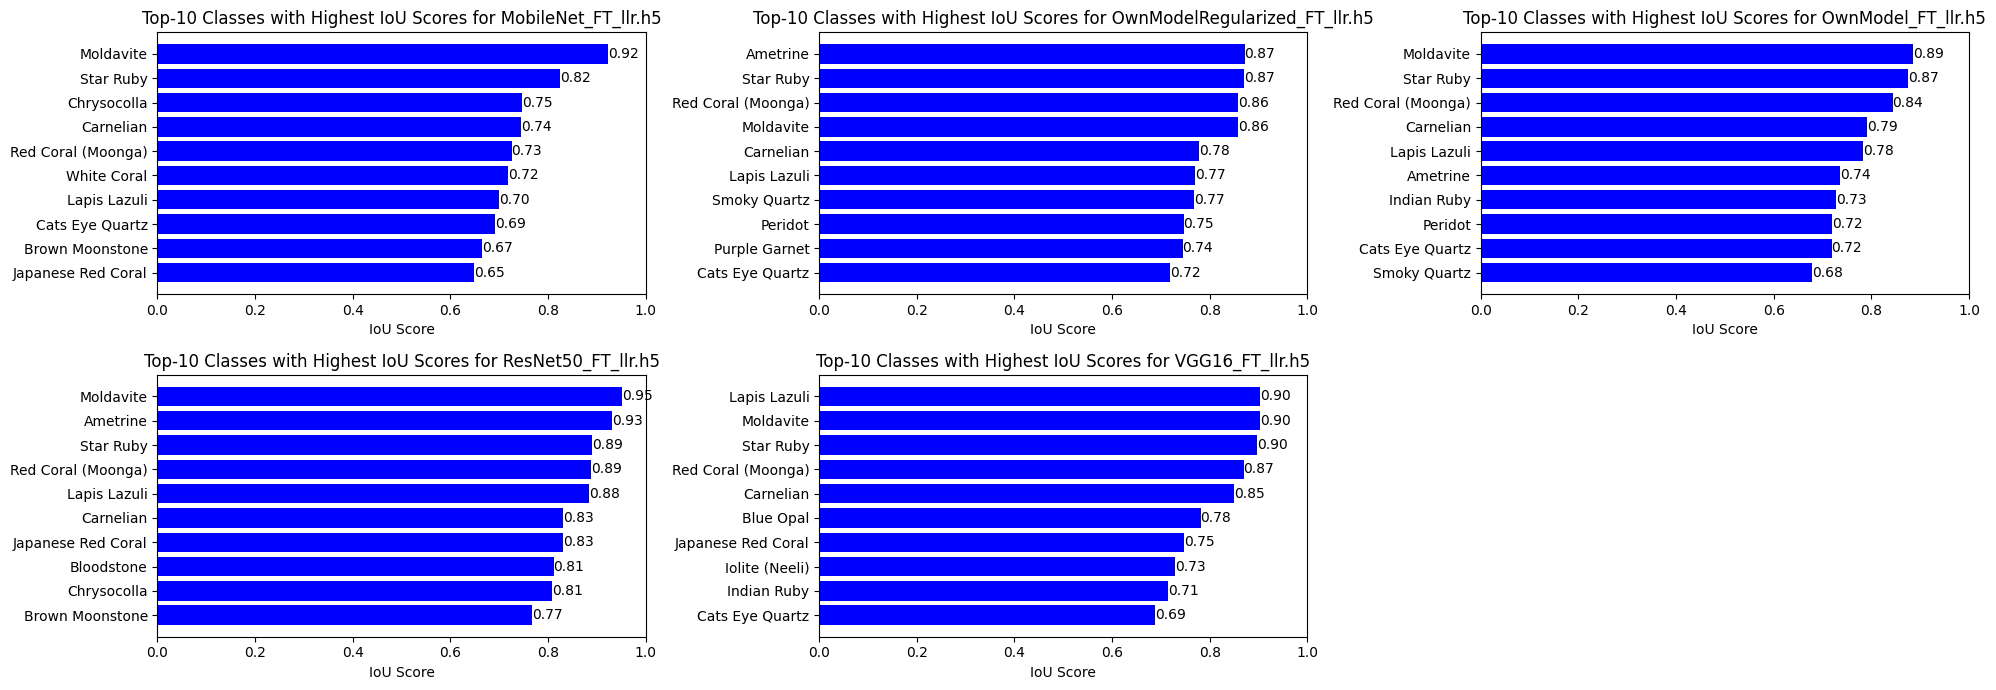

In [38]:
import matplotlib.pyplot as plt

# Define the grid size
num_rows = 2
num_cols = 3

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 7))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Iterate over the results dictionary
for i, (model, result) in enumerate(results.items()):
    # Get the subplot for the current model
    ax = axs[i]
    top_k_indices = np.argsort(result['ious'])[-k:][::-1]
    top_k_ious = result['ious'][top_k_indices]
    top_k_class_names = [index_to_class[i] for i in top_k_indices]

    # Plot the data on the subplot
    ax.barh(top_k_class_names, top_k_ious, color='blue')

    ax.set_xlabel('IoU Score')
    ax.set_xlim([0, 1])
    ax.set_title(f'Top-{k} Classes with Highest IoU Scores for {model.split(" ")[0]}')
    ax.invert_yaxis()  # Invert y-axis to have the highest value on top
    for j, iou in enumerate(top_k_ious):
        ax.text(iou, j, f'{iou:.2f}', ha='left', va='center')


# Remove any extra subplots if the number of models is less than the grid size
if len(results) < num_rows * num_cols:
    for j in range(len(results), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


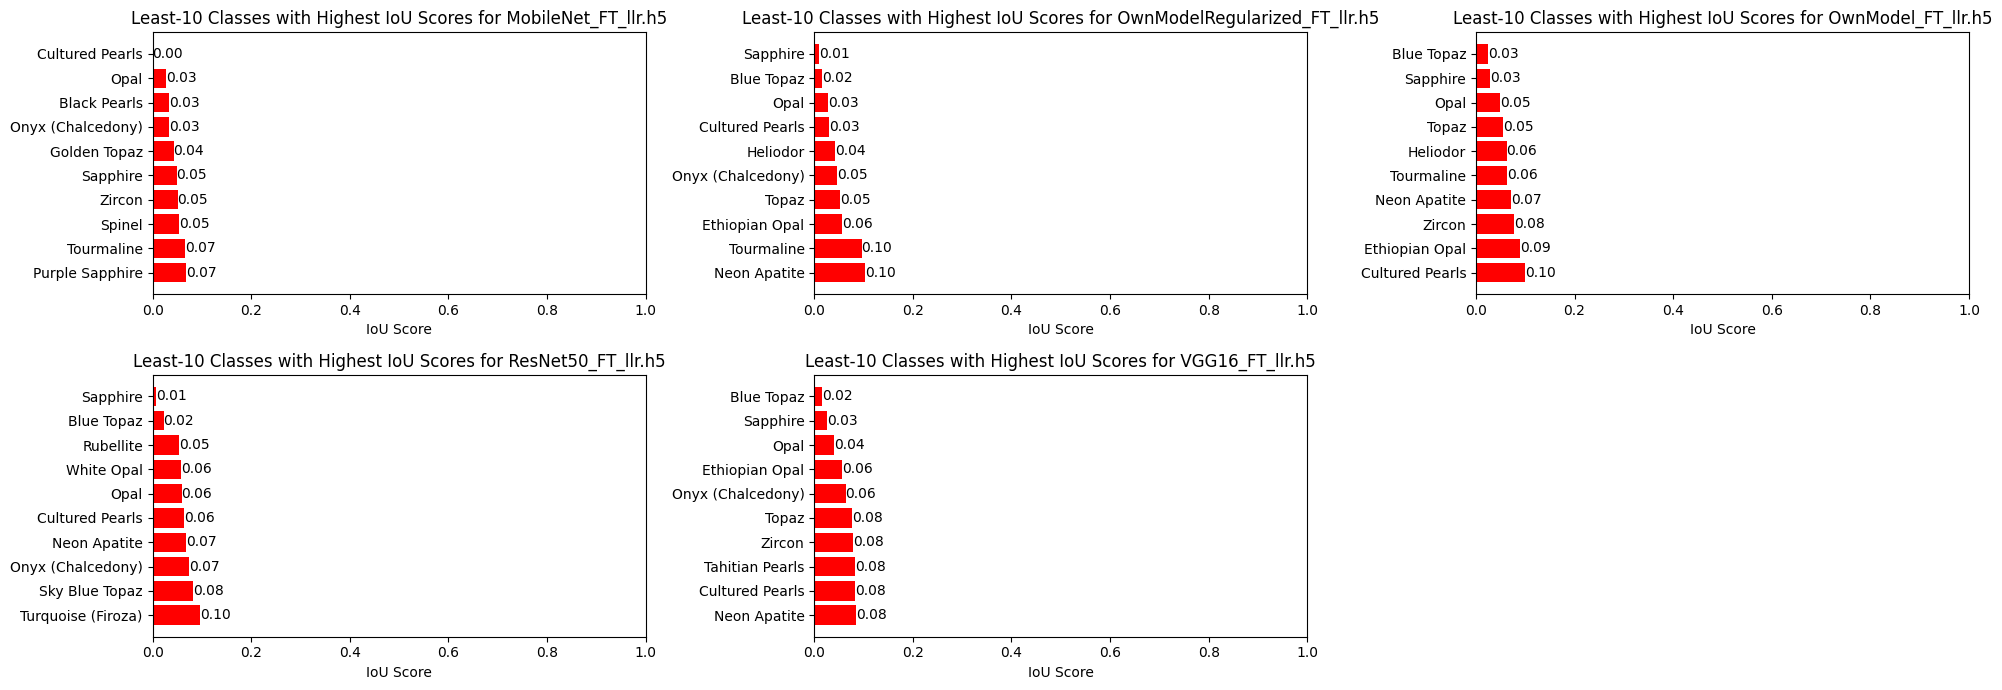

In [40]:
import matplotlib.pyplot as plt

# Define the grid size
num_rows = 2
num_cols = 3

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 7))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Iterate over the results dictionary
for i, (model, result) in enumerate(results.items()):
    # Get the subplot for the current model
    ax = axs[i]
    last_k_indices = np.argsort(result['ious'])[:k]
    last_k_ious = result['ious'][last_k_indices]
    last_k_class_names = [index_to_class[i] for i in last_k_indices]

    # Plot the data on the subplot
    ax.barh(last_k_class_names, last_k_ious, color='red')

    ax.set_xlabel('IoU Score')
    ax.set_xlim([0, 1])
    ax.set_title(f'Least-{k} Classes with Highest IoU Scores for {model.split(" ")[0]}')
    ax.invert_yaxis()  # Invert y-axis to have the highest value on top
    for j, iou in enumerate(last_k_ious):
        ax.text(iou, j, f'{iou:.2f}', ha='left', va='center')


# Remove any extra subplots if the number of models is less than the grid size
if len(results) < num_rows * num_cols:
    for j in range(len(results), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


#### Sorted by value

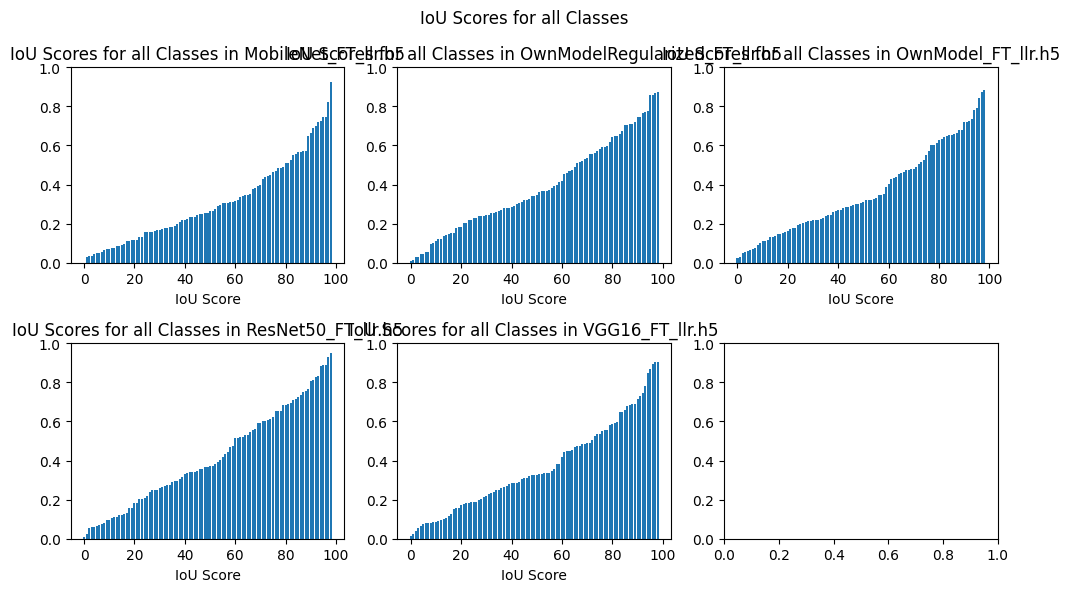

In [43]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle('IoU Scores for all Classes')

for i, (model, result) in enumerate(results.items()):
    row = i // 3
    col = i % 3
    axs[row, col].bar(list(range(len(result['ious']))), result['ious'][np.argsort(result['ious'])])
    axs[row, col].set_xlabel('IoU Score')
    axs[row, col].set_ylim([0, 1])
    axs[row, col].set_title(f'IoU Scores for all Classes in {model.split(" ")[0]}')

plt.tight_layout()
plt.show()


In [47]:
### Precision

In [48]:
num_classes = np.max(true_classes) + 1  # Assuming class labels are 0-indexed
# Parameters for top-k and last-k
k = 10

for model, result in results.items():
    predicted_labels = result['predicted_labels']
    precisions = []
    for class_id in range(num_classes):
        TP = np.sum((predicted_labels == class_id) & (true_classes == class_id))
        FP = np.sum((predicted_labels == class_id) & (true_classes != class_id))
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        precisions.append(precision)

    # Convert precisions to a numpy array if it's not already
    precisions_array = np.array(precisions)

    results[model]['precisions'] = precisions_array

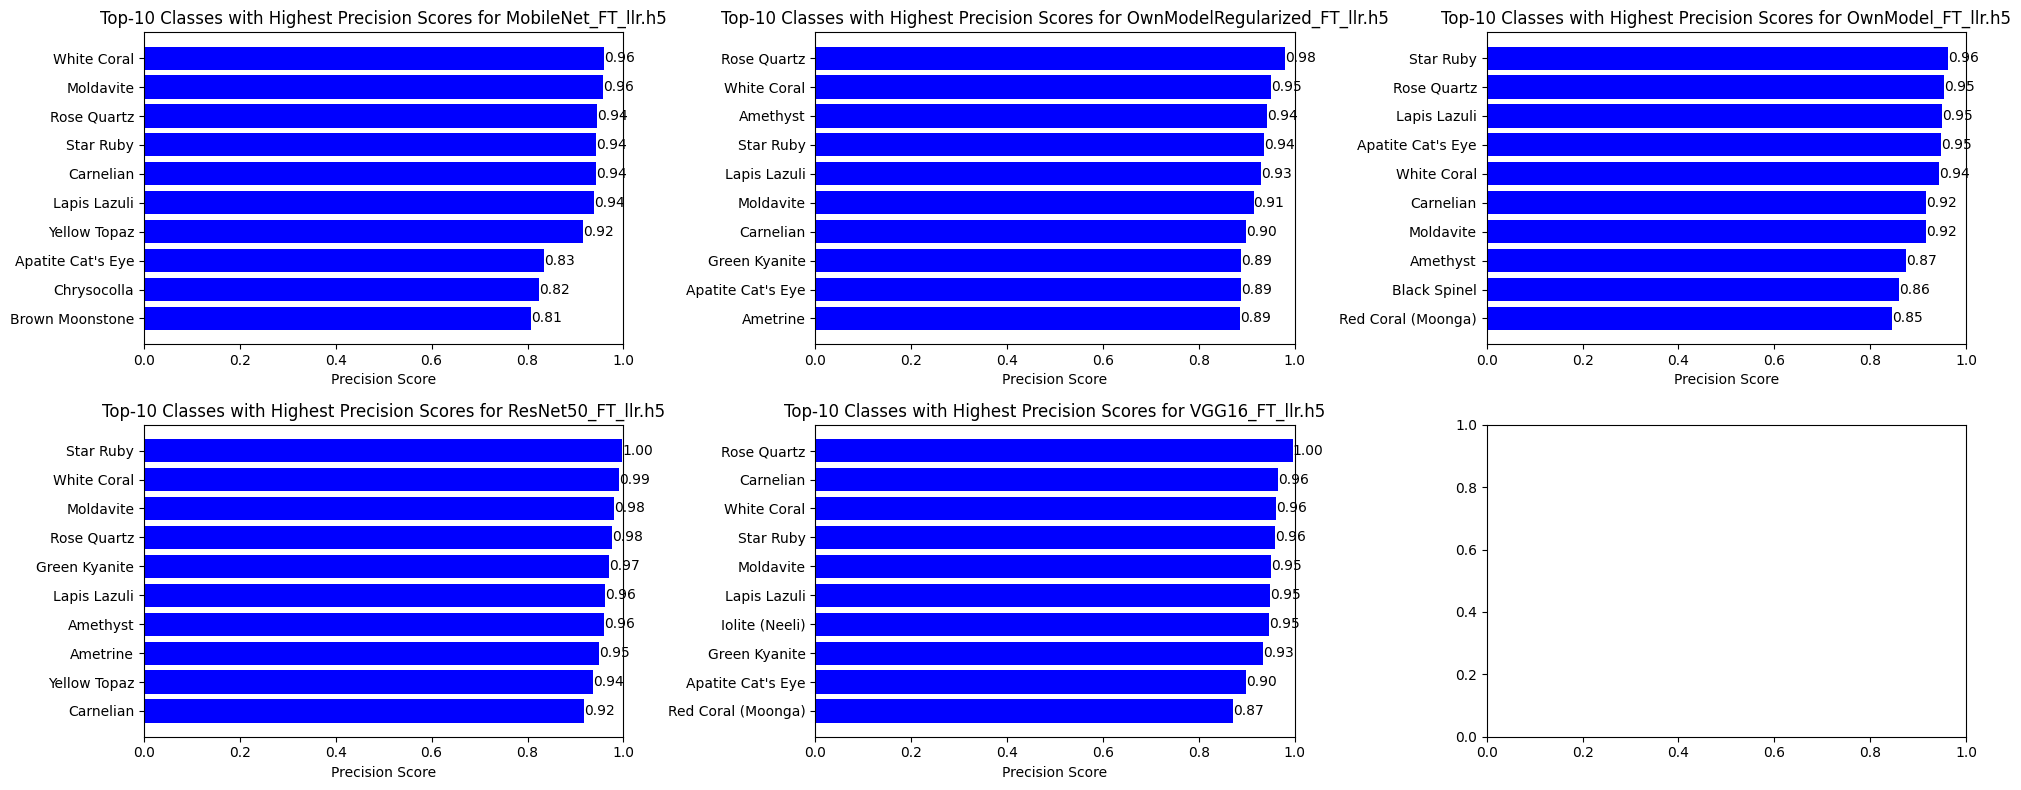

In [54]:
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for i, model in enumerate(models):
    result = results[model]
    top_k_indices = np.argsort(result['precisions'])[-k:][::-1]
    top_k_precisions = result['precisions'][top_k_indices]
    top_k_class_names = [index_to_class[i] for i in top_k_indices]
    
    row = i // 3
    col = i % 3
    
    axs[row, col].barh(top_k_class_names, top_k_precisions, color='blue')

    for i, precision in enumerate(top_k_precisions):
        axs[row, col].text(precision, i, f'{precision:.2f}', ha='left', va='center')

    axs[row, col].set_title(f'Top-{k} Classes with Highest Precision Scores for {model}')
    axs[row, col].set_xlabel('Precision Score')
    axs[row, col].set_xlim([0, 1])
    axs[row, col].invert_yaxis()  # Invert y-axis to have the highest value on top

plt.tight_layout()
plt.show()


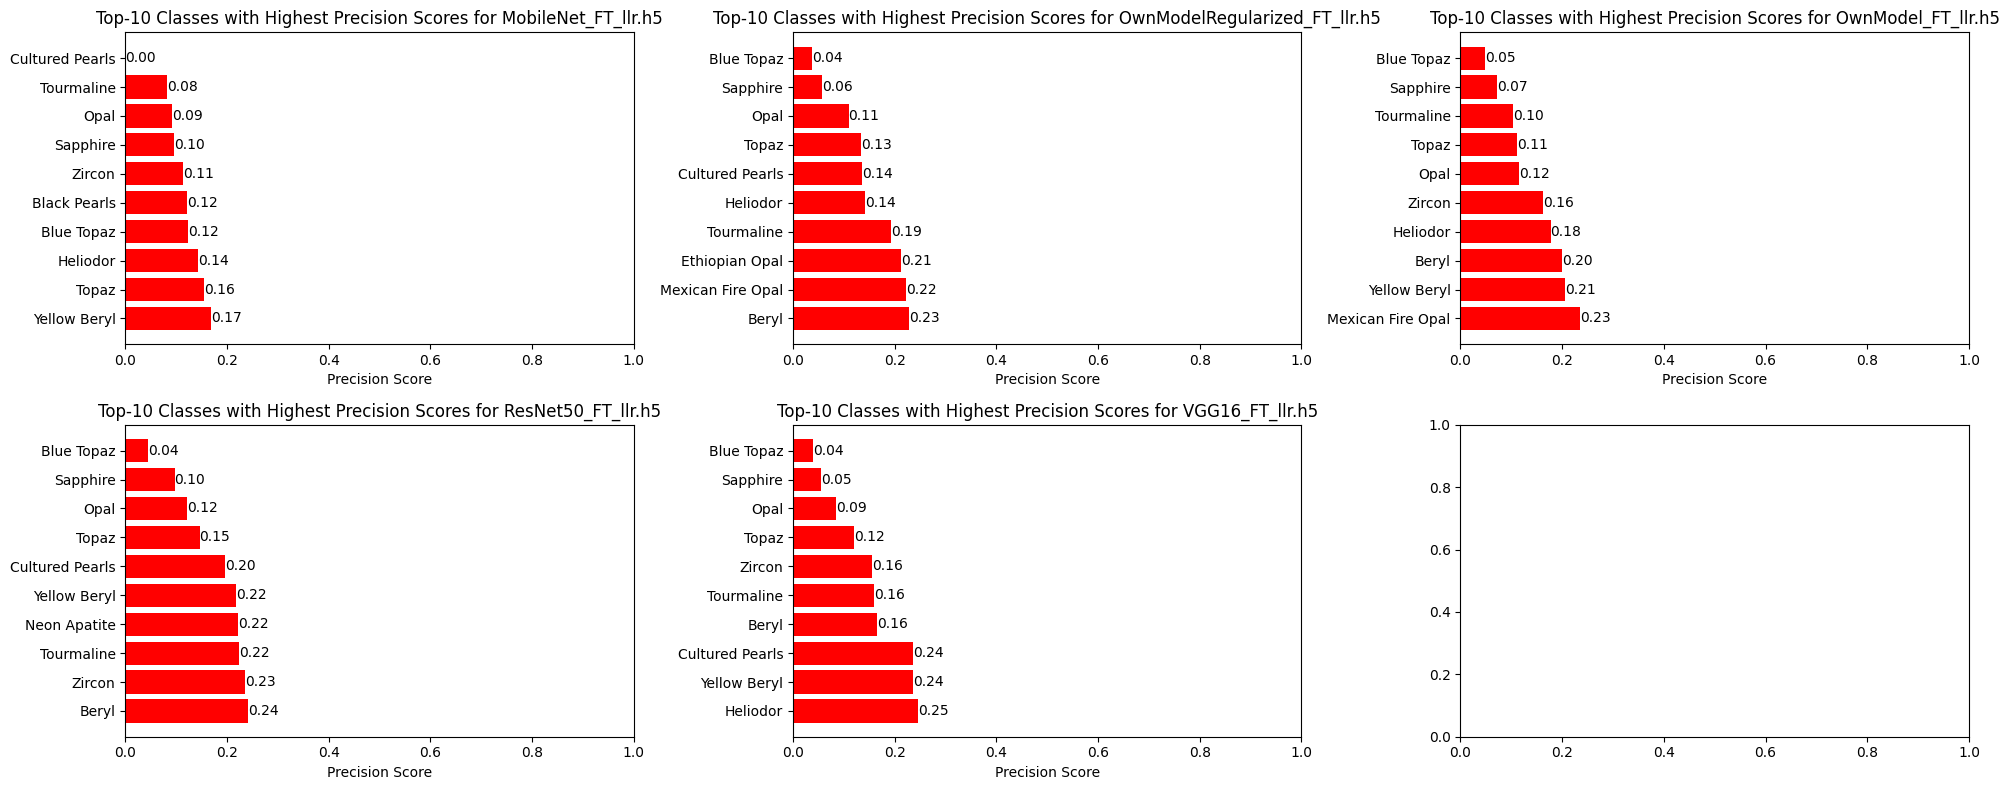

In [53]:
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for i, model in enumerate(models):
    result = results[model]
    last_k_indices = np.argsort(result['precisions'])[:k]
    last_k_precisions = result['precisions'][last_k_indices]
    last_k_class_names = [index_to_class[i] for i in last_k_indices]
    
    row = i // 3
    col = i % 3
    
    axs[row, col].barh(last_k_class_names, last_k_precisions, color='red')

    for i, precision in enumerate(last_k_precisions):
        axs[row, col].text(precision, i, f'{precision:.2f}', ha='left', va='center')

    axs[row, col].set_title(f'Top-{k} Classes with Highest Precision Scores for {model}')
    axs[row, col].set_xlabel('Precision Score')
    axs[row, col].set_xlim([0, 1])
    axs[row, col].invert_yaxis()  # Invert y-axis to have the highest value on top

plt.tight_layout()
plt.show()


### What was misclassified as what?

In [57]:
data_path = r'C:\Users\david\projects\University\gemstone-classifier\dat\gempundit_2022'
predicted_labels = results['OwnModelRegularized_FT_llr.h5']['predicted_labels']
last_k_indices = np.argsort(results['OwnModelRegularized_FT_llr.h5']['precisions'])[:k]

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_labels)


for class_id in last_k_indices:
    class_row = cm[class_id, :].copy()
    class_row[class_id] = 0  # Zero out the diagonal
    
    number_of_misclassifications = np.sum(class_row)
    
    # Most common misclassification
    most_common_misclassified_as = np.argmax(class_row)
    most_common_count = class_row[most_common_misclassified_as]
    most_common_percentage_misclassified = round(most_common_count / number_of_misclassifications * 100, 1)
    
    # Second most common misclassification
    class_row[most_common_misclassified_as] = 0  # Zero out the most common
    second_most_common_misclassified_as = np.argmax(class_row)
    second_most_common_count = class_row[second_most_common_misclassified_as]
    second_most_common_percentage_misclassified = round(second_most_common_count / number_of_misclassifications * 100, 1)
    
    image_count = len(os.listdir(os.path.join(data_path, index_to_class[class_id])))
    
    # Print results 'CVN15J~1' is 'Natural Sapphire'
    print(f"Class '{index_to_class[class_id]}' misclassified {most_common_percentage_misclassified}% as '{index_to_class[most_common_misclassified_as]}' and {second_most_common_percentage_misclassified}% as '{index_to_class[second_most_common_misclassified_as]}'.")

Class 'Blue Topaz' misclassified 71.0% as 'Swiss Blue Topaz' and 7.9% as 'London Blue Topaz'.
Class 'Sapphire' misclassified 30.1% as 'CVN15J~1' and 22.3% as 'Blue Sapphire (Neelam)'.
Class 'Opal' misclassified 43.9% as 'Australian Opal' and 17.4% as 'Black Opal'.
Class 'Topaz' misclassified 57.9% as 'Swiss Blue Topaz' and 4.6% as 'London Blue Topaz'.
Class 'Cultured Pearls' misclassified 72.7% as 'South Sea Pearls' and 15.1% as 'Pearl (Moti)'.
Class 'Heliodor' misclassified 42.4% as 'Beryl' and 40.4% as 'Yellow Beryl'.
Class 'Tourmaline' misclassified 27.7% as 'Green Tourmaline (Verdelite)' and 9.5% as 'Alexandrite'.
Class 'Ethiopian Opal' misclassified 48.5% as 'Black Opal' and 16.7% as 'Opal'.
Class 'Mexican Fire Opal' misclassified 34.4% as 'Fire Opal' and 23.9% as 'Citrine (Sunela)'.
Class 'Beryl' misclassified 53.0% as 'Yellow Beryl' and 17.2% as 'Citrine (Sunela)'.
